In [ ]:
!pip install tensorflow==2.6.0
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install tensorflow==2.6.0 keras==2.6.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import metrics
import tensorflow as tf

# 데이터 경로
train_dir = '/content/drive/MyDrive/data_ABC_10Class_1080_p/train'
val_dir = '/content/drive/MyDrive/data_ABC_10Class_1080_p/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet50 모델 불러오기
resnet = ResNet50(input_shape=(img_size[0], img_size[1], img_channel), weights='imagenet', include_top=False) # ImageNet으로 사전 학습된 가중치를 초기 가중치로 사용

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 학습률 스케줄링 콜백 설정
lr_scheduler = LearningRateScheduler(scheduler)

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True, # 가장 성능이 좋은 가중치 저장 여부
    save_weights_only=True, # 모델, 가중치 저장 선택
    verbose=1)

# 조기 종료 콜백 설정
#early_stopping_callback = EarlyStopping(
#    monitor='val_loss',
#    patience=5, # val_loss가 최소 5 epoch 동안 개선되지 않으면 학습 중단
#    restore_best_weights=True) # 가장 성능이 좋은 가중치 복원 여부

# 모델 학습
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, lr_scheduler])

Found 8626 images belonging to 10 classes.
Found 2514 images belonging to 10 classes.
Epoch 1/30
540/540 [==============================] - ETA: 0s - loss: 0.7173 - accuracy: 0.7673 - precision_1: 0.8615 - recall_1: 0.7090
Epoch 1: val_loss improved from inf to 2.43122, saving model to /content/drive/MyDrive/checkpoint/model-001.h5
540/540 [==============================] - 292s 475ms/step - loss: 0.7173 - accuracy: 0.7673 - precision_1: 0.8615 - recall_1: 0.7090 - val_loss: 2.4312 - val_accuracy: 0.1213 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - lr: 0.0010
Epoch 2/30
540/540 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9541 - precision_1: 0.9622 - recall_1: 0.9464
Epoch 2: val_loss improved from 2.43122 to 0.23491, saving model to /content/drive/MyDrive/checkpoint/model-002.h5
540/540 [==============================] - 259s 480ms/step - loss: 0.1716 - accuracy: 0.9541 - precision_1: 0.9622 - recall_1: 0.9464 - val_loss: 0.2349 - val_accuracy:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import metrics
import tensorflow as tf

# 데이터 경로
train_dir = '/content/drive/MyDrive/data_all/train'
val_dir = '/content/drive/MyDrive/data_all/val'

# 이미지 크기 및 채널
img_size = (224, 224)
img_channel = 3

# 이미지 데이터 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=10,
    channel_shift_range=50,
    brightness_range=(0.8,1.8),
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical') # categorical, binary, sparse 선택

# ResNet50 모델 불러오기
resnet = ResNet50(input_shape=(img_size[0], img_size[1], img_channel), weights=None, include_top=False)

# 새로운 분류층 추가
x = resnet.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(16, activation='softmax')(x) # 클래스 개수만큼 조정

model = models.Model(inputs=resnet.input, outputs=predictions)

# 옵티마이저 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=1.6530e-04)

# 이전에 저장된 모델 가중치 불러오기
model.load_weights('/content/drive/MyDrive/checkpoint/checkpoints/model-028.h5') # 경로 작성

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# 스케줄러 함수 정의
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# 학습률 스케줄링 콜백 설정
lr_scheduler = LearningRateScheduler(scheduler)

# 체크포인트를 저장할 경로
checkpoint_filepath = '/content/drive/MyDrive/checkpoint/checkpoints/model-{epoch:03d}.h5'

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True, # 가장 성능이 좋은 가중치 저장 여부
    save_weights_only=True, # 모델, 가중치 저장 선택
    verbose=1)

# 학습 이어서 시작
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=30,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint_callback, lr_scheduler],
          initial_epoch=28) # initial_epoch = 이전에 중단된 epoch 숫자

In [ ]:
import matplotlib.pyplot as plt

val_accuracy = [0.0633, 0.1247, 0.0937, 0.5093, 0.7972, 0.9871, 0.7835, 0.8470, 0.9924, 0.8866, 0.5740, 0.9976, 0.9429, 0.9992, 0.9994, 0.9139, 0.9973, 0.9988, 0.9433, 0.9935, 0.9976, 0.9994, 0.9802, 0.9994, 0.9994, 0.9992, 0.9863, 0.9994, 0.9998, 0.9998]
val_loss = [2.7814, 5.4298, 17.4214, 1.4944, 0.8378, 0.0323, 0.9265, 0.7361, 0.0292, 0.3111, 1.6086, 0.0085, 0.2497, 0.0032, 0.0057, 0.3580, 0.0085, 0.0061, 0.1761, 0.0235, 0.0067, 0.0017, 0.0843, 8.9025e-04, 8.8536e-04, 9.5349e-04, 0.0566, 7.5358e-04, 6.9298e-04, 4.2381e-04]

# 정확도 그래프
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.show()

# 손실 그래프
plt.plot(val_loss, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 2)
plt.show()

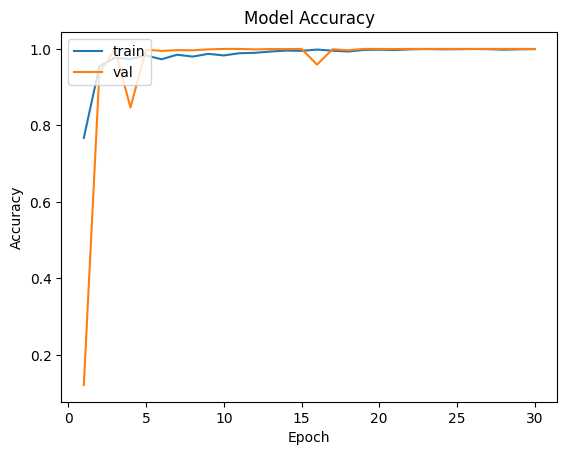

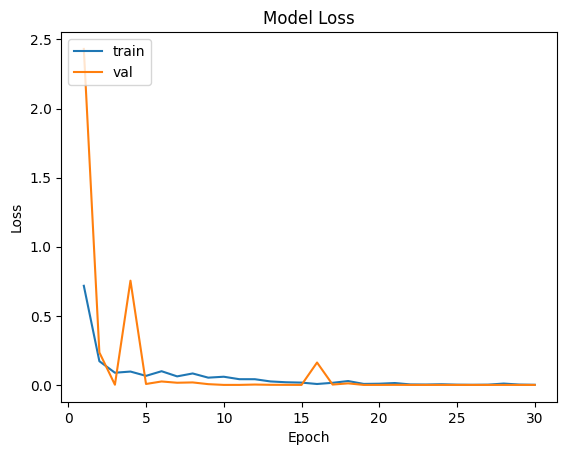

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 곡선 그리기
num_epochs = len(history.history['accuracy'])
epoch_range = np.arange(1, num_epochs + 1)

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['precision'])
plt.plot(epoch_range, history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epoch_range, history.history['recall'])
plt.plot(epoch_range, history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 구글 드라이브에 모델 저장
model.save('/content/drive/MyDrive/ResNet50_data_ABC_10Class_1080_p.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# 전체 데이터 세트 중 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/data_ABC_10Class_1080_p/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_ABC_10Class_1080_p.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

Found 1239 images belonging to 10 classes.
1239/1239 [==============================] - 896s 722ms/step
테스트 결과
---------------------
back/back_left103.jpg : back
back/back_left120.jpg : back
back/back_left1209.jpg : back
back/back_left121.jpg : back
back/back_left1213.jpg : back
back/back_left1214.jpg : back
back/back_left1215.jpg : back
back/back_left1217.jpg : back
back/back_left1219.jpg : back
back/back_left122.jpg : back
back/back_left1220.jpg : back
back/back_left1221.jpg : back
back/back_left1222.jpg : back
back/back_left1223.jpg : back
back/back_left1225.jpg : back
back/back_left1226.jpg : back
back/back_left1227.jpg : back
back/back_left1228.jpg : back
back/back_left1229.jpg : back
back/back_left1232.jpg : back
back/back_left1233.jpg : back
back/back_left1234.jpg : back
back/back_left1236.jpg : back
back/back_left1237.jpg : back
back/back_left1239.jpg : back
back/back_left1240.jpg : back
back/back_left1241.jpg : back
back/back_left1242.jpg : back
back/back_left1243.jpg : back
b

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# BC 테스트 데이터 세트 폴더 경로
test_dir = '/content/drive/MyDrive/data_BC_10Class_1080_p/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_ABC_10Class_1080_p.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

# Confusion Matrix and Classification Report
cm = confusion_matrix(true_labels, y_pred)
print('Confusion Matrix')
print(cm)

# 각 클래스별 정밀도, 재현율, F1-score, 그리고 지지도(support, 샘플 수)를 계산
cr = classification_report(true_labels, y_pred, target_names=class_labels)
print('Classification Report')
print(cr)

Found 647 images belonging to 10 classes.
647/647 [==============================] - 395s 610ms/step
테스트 결과
---------------------
back/back_left1209.jpg : back
back/back_left1213.jpg : back
back/back_left1214.jpg : back
back/back_left1215.jpg : back
back/back_left1217.jpg : back
back/back_left1219.jpg : back
back/back_left1220.jpg : back
back/back_left1221.jpg : back
back/back_left1222.jpg : back
back/back_left1223.jpg : back
back/back_left1225.jpg : back
back/back_left1226.jpg : back
back/back_left1227.jpg : back
back/back_left1228.jpg : back
back/back_left1229.jpg : back
back/back_left1232.jpg : back
back/back_left1233.jpg : back
back/back_left1234.jpg : back
back/back_left1236.jpg : back
back/back_left1237.jpg : back
back/back_left1239.jpg : back
back/back_left1240.jpg : back
back/back_left1241.jpg : back
back/back_left1242.jpg : back
back/back_left1243.jpg : back
back/back_left1244.jpg : back
back/back_left1337.jpg : back
back/back_left1350.jpg : back
back/back_left1357.jpg : back


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# DE 테스트 데이터 세트 폴더 경로
test_dir = '/content/drive/MyDrive/data_DE_10Class_1080_p/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_ABC_10Class_1080_p.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

# Confusion Matrix and Classification Report
cm = confusion_matrix(true_labels, y_pred)
print('Confusion Matrix')
print(cm)

# 각 클래스별 정밀도, 재현율, F1-score, 그리고 지지도(support, 샘플 수)를 계산
cr = classification_report(true_labels, y_pred, target_names=class_labels)
print('Classification Report')
print(cr)

Found 574 images belonging to 10 classes.
574/574 [==============================] - 443s 772ms/step
테스트 결과
---------------------
back/back_left_D0.jpg : back_right
back/back_left_D10.jpg : back_right
back/back_left_D100.jpg : back_right
back/back_left_D108.jpg : back_right
back/back_left_D118.jpg : back_right
back/back_left_D140.jpg : back_right
back/back_left_D146.jpg : back_hurray
back/back_left_D151.jpg : back_hurray
back/back_left_D154.jpg : back_hurray
back/back_left_D17.jpg : back_right
back/back_left_D18.jpg : back_right
back/back_left_D19.jpg : back_right
back/back_left_D2.jpg : back_right
back/back_left_D45.jpg : back_right
back/back_left_D46.jpg : back_right
back/back_left_D48.jpg : back_right
back/back_left_D5.jpg : back_right
back/back_left_D53.jpg : back_right
back/back_left_D62.jpg : back_right
back/back_left_D70.jpg : back_right
back/back_left_E10.jpg : back_right
back/back_left_E113.jpg : back_hurray
back/back_left_E122.jpg : back_right
back/back_left_E123.jpg : back_r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# BCDE 테스트 데이터 폴더 경로
test_dir = '/content/drive/MyDrive/data_BCDE_10Class_1080_p/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_ABC_10Class_1080_p.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

Found 1221 images belonging to 10 classes.
1221/1221 [==============================] - 645s 528ms/step
테스트 결과
---------------------
back/back_left1209.jpg : left
back/back_left1213.jpg : right
back/back_left1214.jpg : left
back/back_left1215.jpg : left
back/back_left1217.jpg : left
back/back_left1219.jpg : left
back/back_left1220.jpg : right
back/back_left1221.jpg : right
back/back_left1222.jpg : left
back/back_left1223.jpg : left
back/back_left1225.jpg : right
back/back_left1226.jpg : left
back/back_left1227.jpg : right
back/back_left1228.jpg : right
back/back_left1229.jpg : left
back/back_left1232.jpg : right
back/back_left1233.jpg : right
back/back_left1234.jpg : right
back/back_left1236.jpg : right
back/back_left1237.jpg : right
back/back_left1239.jpg : right
back/back_left1240.jpg : right
back/back_left1241.jpg : right
back/back_left1242.jpg : left
back/back_left1243.jpg : right
back/back_left1244.jpg : right
back/back_left1337.jpg : right
back/back_left1350.jpg : right
back/back

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# FG 테스트 데이터 세트 폴더 경로
test_dir = '/content/drive/MyDrive/data_FG_10Class_1080/test'

image_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

# 저장된 모델 경로
model = load_model('/content/drive/MyDrive/ResNet50_data_ABC_10Class_1080_p.h5')

# 분류 및 평가
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 출력
print('테스트 결과')
print('---------------------')
for i, filename in enumerate(test_generator.filenames):
    print('{} : {}'.format(filename, class_labels[y_pred[i]]))

accuracy = accuracy_score(true_labels, y_pred)
precision = precision_score(true_labels, y_pred, average='macro')
recall = recall_score(true_labels, y_pred, average='macro')
f1score = f1_score(true_labels, y_pred, average='macro')

print('---------------------')
print('정확도 : {:.5f}'.format(accuracy))
print('정밀도 : {:.5f}'.format(precision))
print('재현율 : {:.5f}'.format(recall))
print('F1-score : {:.5f}'.format(f1score))

# Confusion Matrix and Classification Report
cm = confusion_matrix(true_labels, y_pred)
print('Confusion Matrix')
print(cm)

# 각 클래스별 정밀도, 재현율, F1-score, 그리고 지지도(support, 샘플 수)를 계산
cr = classification_report(true_labels, y_pred, target_names=class_labels)
print('Classification Report')
print(cr)

Found 1120 images belonging to 10 classes.
1120/1120 [==============================] - 271s 233ms/step
테스트 결과
---------------------
back/back_left_Fp100.jpg : right
back/back_left_Fp107.jpg : back_left
back/back_left_Fp110.jpg : back_left
back/back_left_Fp12.jpg : back
back/back_left_Fp127.jpg : right
back/back_left_Fp131.jpg : right
back/back_left_Fp139.jpg : right
back/back_left_Fp153.jpg : right
back/back_left_Fp158.jpg : right
back/back_left_Fp160.jpg : right
back/back_left_Fp164.jpg : right
back/back_left_Fp33.jpg : back
back/back_left_Fp52.jpg : right
back/back_left_Fp54.jpg : back
back/back_left_Fp58.jpg : right
back/back_left_Fp65.jpg : right
back/back_left_Fp71.jpg : right
back/back_left_Fp76.jpg : right
back/back_left_Fp90.jpg : right
back/back_left_Fp93.jpg : right
back/back_left_Fy109.jpg : right
back/back_left_Fy120.jpg : right
back/back_left_Fy125.jpg : right
back/back_left_Fy129.jpg : right
back/back_left_Fy135.jpg : right
back/back_left_Fy148.jpg : right
back/back_left